In [1]:
import sys
sys.path.append("../Lab1")
from linreg import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

## Loading and exploring data

In [2]:
df = pd.read_csv("data/bike.csv")
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


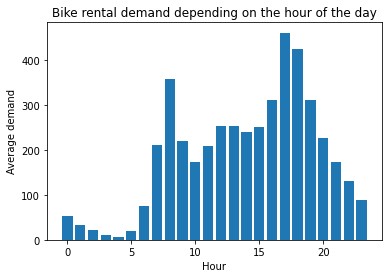

In [3]:
plt.bar(df.hr.unique(), df.groupby("hr").mean().demand)
plt.title("Bike rental demand depending on the hour of the day")
plt.xlabel("Hour")
plt.ylabel("Average demand")
plt.show()

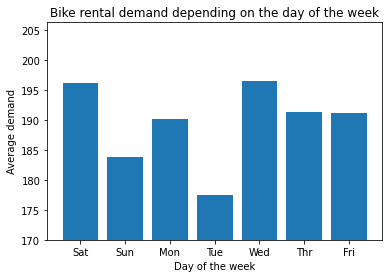

In [4]:
plt.bar(df.dayOfWeek.unique(), df.groupby("dayOfWeek").mean().demand)
plt.title("Bike rental demand depending on the day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Average demand")
plt.ylim(170)
plt.show()

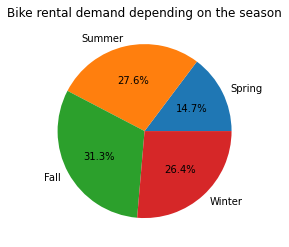

In [5]:
plt.pie(df.groupby("season").mean().demand, labels=["Spring", "Summer", "Fall", "Winter"], autopct='%1.1f%%')
plt.title("Bike rental demand depending on the season")
plt.show()

## Data preprocessing

In [6]:
# convert dayOfWeek to a numeric value
# ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thr' 'Fri'] -> [2 3 1 5 6 4 0]
df["dayOfWeek"] = df["dayOfWeek"].astype("category").cat.codes
df.describe()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,2.992577,361.562576,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,1.997928,209.042828,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,1.000000,181.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,3.000000,362.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,5.000000,543.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,6.000000,724.000000,977.000000


## Building models

### Gradient descent

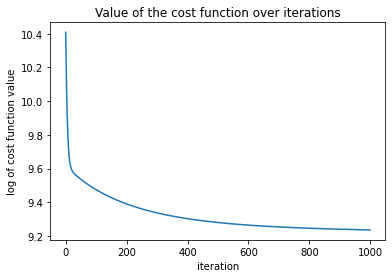

Gradient descent coefficients:
[[  10.57261615]
 [  57.65306334]
 [  66.88499086]
 [  -3.54822046]
 [ 185.93908463]
 [ -14.95475543]
 [   6.46978845]
 [ -46.72701048]
 [ 194.12687062]
 [-139.7712638 ]
 [  34.13513585]
 [  -4.60705832]
 [  31.5930692 ]]
MAE:
106.71599438383849
R2:
0.31567729304944814


In [7]:
# alpha=0.03
model_grad1 = LinearRegression(df)
model_grad1.gradientDescent()
model_grad1.plotCost()
print("Gradient descent coefficients:")
print(model_grad1.w)

print("MAE:")
print(model_grad1.MAE)
print("R2:")
print(model_grad1.R2)

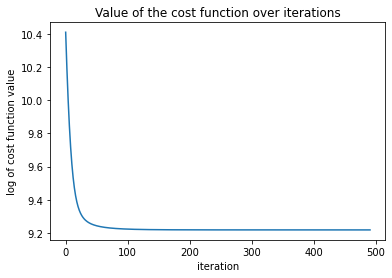

Gradient descent coefficients:
[[  11.40482863]
 [  60.55667464]
 [  68.69983203]
 [ -11.71843119]
 [ 177.38438754]
 [ -25.46906349]
 [   4.46031855]
 [ -12.26035744]
 [ 277.51319956]
 [-194.8364734 ]
 [  27.28656029]
 [  -3.5762294 ]
 [  24.61613688]]
MAE:
106.08301222560972
R2:
0.3874408742571374


In [8]:
# alpha=0.5
model_grad2 = LinearRegression(df)
model_grad2.gradientDescent(alpha=0.5)
model_grad2.plotCost()
print("Gradient descent coefficients:")
print(model_grad2.w)

print("MAE:")
print(model_grad2.MAE)
print("R2:")
print(model_grad2.R2)

### Normal equation

In [9]:
# normal equation
model_norm = LinearRegression(df)
model_norm.normalEquation()
print("Normal equation coefficients:")
print(model_norm.w)

print("MAE:")
print(model_norm.MAE)
print("R2:")
print(model_norm.R2)

Normal equation coefficients:
[[  14.98783313]
 [  60.16252605]
 [ 130.49906211]
 [  45.34589888]
 [ 177.1965635 ]
 [ -25.71776461]
 [   4.39311949]
 [ -11.38307031]
 [ 277.33563596]
 [-196.66970757]
 [  25.42133679]
 [  -3.67694803]
 [ -98.37981593]]
MAE:
106.07191214169981
R2:
0.38746636440161186


### Scikit-Learn

In [10]:
print("Scikit-learn")
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

reg = linear_model.LinearRegression()
reg.fit(X, y)
s = np.insert(reg.coef_.T, 0, reg.intercept_)
print(np.vstack(s))

print("MAE:", mean_absolute_error(y, reg.predict(X)))
print("R2:", r2_score(y, reg.predict(X)))

Scikit-learn
[[  14.98783313]
 [  60.16252605]
 [ 130.49906211]
 [  45.34589888]
 [ 177.1965635 ]
 [ -25.71776461]
 [   4.39311949]
 [ -11.38307031]
 [ 277.33563596]
 [-196.66970757]
 [  25.42133679]
 [  -3.67694803]
 [ -98.37981592]]
MAE: 106.07191214169359
R2: 0.3874663644014942


## Insights

In [11]:
df2 = df.copy()
df2["predicted"] = model_norm.predict(df.iloc[:, :-1])
df2

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand,predicted
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,2,0,16,-83.281259
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,2,0,40,-79.270274
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,2,0,32,-71.566076
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,2,0,13,-48.368481
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,2,0,1,-40.664283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,1,723,119,193.778440
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,1,723,89,201.482638
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,1,724,90,212.845310
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,1,724,61,227.522799


In [12]:
df2.groupby("hr").agg(["mean", "std"])[["demand", "predicted"]]

demand               predicted           
          mean         std        mean        std
hr                                               
0    53.898072   42.307910   78.892498  77.797604
1    33.375691   33.538727   81.560627  76.703515
2    22.869930   26.578642   85.944259  75.360598
3    11.727403   13.239190   91.276537  73.085264
4     6.352941    4.143818   95.582429  72.130255
5    19.889819   13.200765   98.558035  73.031937
6    76.044138   55.084348  104.309629  73.849411
7   212.064649  161.441936  116.394287  76.973220
8   359.011004  235.189285  134.573842  81.668746
9   219.309491   93.703458  156.891599  84.321757
10  173.668501  102.205413  180.724288  87.711989
11  208.143054  127.495536  203.645079  89.302177
12  253.315934  145.081134  223.272510  90.804317
13  253.661180  148.107657  240.355270  91.216093
14  240.949246  147.271574  254.217804  92.290443
15  251.233196  144.632541  263.981888  92.854856
16  311.983562  148.682618  269.993194  93.027638
17  461.452055  232.656611  271.126780  93.111301
18  425.510989  224.639304  270.481110  90.746232
19  311.523352  161.050359  265.871390  87.882027
20  226.030220  119.670164  263.021648  85.523267
21  172.314560   89.788893  260.636102  82.876256
22  131.335165   69.937782  260.809310  81.303417
23   87.831044   50.846889  261.425808  79.215978

In [13]:
df2.groupby("season").agg(["mean", "std"])[["demand", "predicted"]]

demand               predicted            
              mean         std        mean         std
season                                                
1       111.114569  119.224010  114.180988   98.672881
2       208.344069  188.362473  193.109423  107.547730
3       236.016237  197.711630  257.216384  100.968679
4       198.868856  182.967972  189.144363   95.635376

In [14]:
df2.groupby("holiday").agg(["mean", "std"])[["demand", "predicted"]]

demand              predicted            
              mean         std       mean         std
holiday                                              
0        190.42858  181.981435  190.42858  112.903251
1        156.87000  156.757478  156.87000  108.230434

In [15]:
df2.groupby("weathersit").agg(["mean", "std"])[["demand", "predicted"]]

demand               predicted            
                  mean         std        mean         std
weathersit                                                
1           204.869272  189.487773  207.353742  113.554314
2           175.165493  165.431589  162.653371  102.769168
3           111.579281  133.781045  131.765598  101.711707
4            74.333333   77.925178   26.146430   77.376124

## Feature engineering

In [16]:
df_cleaned = df.copy()
df_cleaned.drop("days", axis=1, inplace=True)

seasons = pd.get_dummies(df_cleaned["season"])
index = df_cleaned.columns.get_loc("season")
df_cleaned.drop("season", axis=1, inplace=True)
df_cleaned.insert(index, "spring", seasons[1])
df_cleaned.insert(index + 1, "summer", seasons[2])
df_cleaned.insert(index + 2, "fall", seasons[3])
df_cleaned.insert(index + 3, "winter", seasons[4])

In [17]:
months = pd.get_dummies(df_cleaned["mnth"])
index = df_cleaned.columns.get_loc("mnth")
df_cleaned.drop("mnth", axis=1, inplace=True)

for i in range(months.shape[1]):
    df_cleaned.insert(index + i, "mnth.{}".format(i + 1), months[i + 1])

In [18]:
hours = pd.get_dummies(df_cleaned["hr"])
index = df_cleaned.columns.get_loc("hr")
df_cleaned.drop("hr", axis=1, inplace=True)

for i in range(hours.shape[1]):
    df_cleaned.insert(index + i, "hr.{}".format(i), hours[i])

In [19]:
# ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thr' 'Fri'] -> [2 3 1 5 6 4 0]
days = pd.get_dummies(df_cleaned["dayOfWeek"])
index = df_cleaned.columns.get_loc("dayOfWeek")
df_cleaned.drop("dayOfWeek", axis=1, inplace=True)
df_cleaned.insert(index, "mon", days[1])
df_cleaned.insert(index + 1, "tue", days[5])
df_cleaned.insert(index + 2, "wed", days[6])
df_cleaned.insert(index + 3, "thr", days[4])
df_cleaned.insert(index + 4, "fri", days[0])
df_cleaned.insert(index + 5, "sat", days[2])
df_cleaned.insert(index + 6, "sun", days[3])

In [20]:
df_cleaned.columns

Index(['spring', 'summer', 'fall', 'winter', 'yr', 'mnth.1', 'mnth.2',
       'mnth.3', 'mnth.4', 'mnth.5', 'mnth.6', 'mnth.7', 'mnth.8', 'mnth.9',
       'mnth.10', 'mnth.11', 'mnth.12', 'hr.0', 'hr.1', 'hr.2', 'hr.3', 'hr.4',
       'hr.5', 'hr.6', 'hr.7', 'hr.8', 'hr.9', 'hr.10', 'hr.11', 'hr.12',
       'hr.13', 'hr.14', 'hr.15', 'hr.16', 'hr.17', 'hr.18', 'hr.19', 'hr.20',
       'hr.21', 'hr.22', 'hr.23', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat',
       'sun', 'demand'],
      dtype='object')

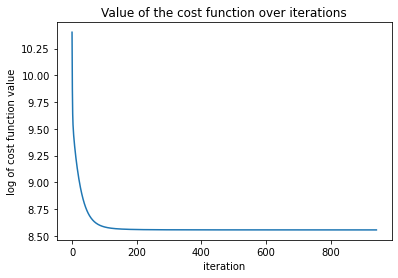

Gradient descent coefficients:
[[  57.68541491]
 [ -19.20098792]
 [  18.55938615]
 [  11.94010973]
 [  49.38690695]
 [  85.68237514]
 [  -0.45103404]
 [   2.50963469]
 [  14.54801841]
 [   6.66220892]
 [  20.27094177]
 [   4.62084855]
 [ -14.71875532]
 [   5.41559178]
 [  31.24646502]
 [  14.8284897 ]
 [ -10.43261489]
 [  -5.81437966]
 [-121.01536714]
 [-138.55460831]
 [-147.62985625]
 [-158.08549216]
 [-161.34612285]
 [-144.11567744]
 [ -85.12091934]
 [  49.60820099]
 [ 190.74948696]
 [  43.45206831]
 [ -11.60373498]
 [  13.96173224]
 [  53.04913592]
 [  47.51664478]
 [  31.38215847]
 [  40.35391786]
 [ 101.8068244 ]
 [ 255.25322157]
 [ 223.78732819]
 [ 115.46033865]
 [  35.29746399]
 [ -13.56953784]
 [ -50.44113959]
 [ -89.51065154]
 [  -4.47122874]
 [  22.19472892]
 [ -73.50890983]
 [ 227.01751952]
 [ -83.82176661]
 [ -36.03369263]
 [   1.47118132]
 [   2.3378096 ]
 [   3.99005923]
 [   4.54277767]
 [   8.38167235]
 [  29.61940211]
 [  13.34251263]]
MAE:
75.5234943373137
R2:
0.68368

In [21]:
# alpha=0.5
model_grad2 = LinearRegression(df_cleaned)
model_grad2.gradientDescent(alpha=0.5)
model_grad2.plotCost()
print("Gradient descent coefficients:")
print(model_grad2.w)

print("MAE:")
print(model_grad2.MAE)
print("R2:")
print(model_grad2.R2)